# Multi-Temporal Dynamic Bayesian Networks

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn 
from DynamicBayesNet import DynamicBayesNet
from notebook import showKTBN, showUnrolled
from notebook import unrollKTBN, showCPT
from notebook import flow, getPosterior, plotFollow


## Building a kTBN

Note the naming convention of variables inside the kTBN. The variables are represented as a tuple, (str, int), with the string being the name of the variable and the int being the timeslice the variable belongs to. *a* for timeslice 2 is represented as ("a", 2).

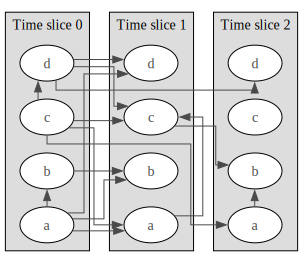

In [14]:
threeDBN = DynamicBayesNet(3)

a = gum.LabelizedVariable("a","a",6)
b = gum.LabelizedVariable("b","b",6)
#c will be added with addFast function
d = gum.LabelizedVariable("d","d",3)

threeDBN.add(a)
threeDBN.add(b)
threeDBN.addFast('c{1|3|9}')
threeDBN.add(d)

threeDBN.addArc(("c", 0), ("d", 0))
threeDBN.addArc(("c", 0), ("a", 1))
threeDBN.addArc(("c", 0), ("c", 1))
threeDBN.addArc(("d", 0), ("c", 1))
threeDBN.addArc(("d", 0), ("d", 1))
threeDBN.addArc(("a", 0), ("a", 1))
threeDBN.addArc(("a", 0), ("d", 1))
threeDBN.addArc(("a", 0), ("b", 1))
threeDBN.addArc(("a", 0), ("b", 0))
threeDBN.addArc(("a", 1), ("c", 1))
threeDBN.addArc(("b", 0), ("b", 1))
threeDBN.addArc(("d", 0), ("d", 2))
threeDBN.addArc(("c", 0), ("a", 2))
threeDBN.addArc(("c", 1), ("b", 2))
threeDBN.addArc(("a", 2), ("b", 2))

showKTBN(threeDBN)


The DBN above is a 3TBN. <br> <br>

We can also generate CPTs and visualize them.

In [21]:
threeDBN.generateCPTs()
showCPT(threeDBN, ("a", 2))

(pyAgrum.Potential@0000025082327A40) 
      ||  ('a', 2)                                                 |
('c', ||0        |1        |2        |3        |4        |5        |
------||---------|---------|---------|---------|---------|---------|
1     || 0.0381  | 0.3806  | 0.0342  | 0.3593  | 0.1606  | 0.0271  |
3     || 0.0891  | 0.1432  | 0.2015  | 0.1884  | 0.1888  | 0.1890  |
9     || 0.2219  | 0.0806  | 0.0072  | 0.2512  | 0.2216  | 0.2174  |

## Unrolling kTBN

A kTBN is 'unrolled' and then showed using the kTBN and the unroll size. For $a_0, a_1 ...  a_{k-1}$ in kTBN, the unrolled dBN will include $a_0, a_1 ...  a_{k-1} ...  a_{T-1}$

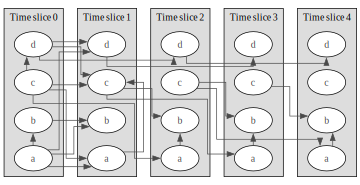

In [7]:
T = 5


dbn = unrollKTBN(threeDBN, T)
showUnrolled(dbn, T)



We can infer on dbn just as on a normal bn. Following the naming convention in kTBN, the variables in a dBN are named using the convention $("a", t)$ where t is the number of their time slice.


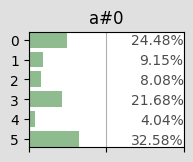
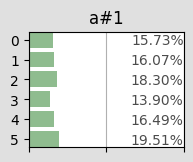
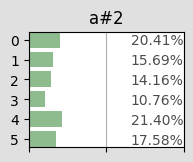
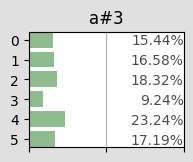
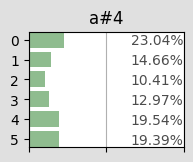

In [10]:
flow.clear()
for i in range(T):
    flow.add_html(getPosterior(dbn,target=('a', i),evs={}),"P(d,"+str(i)+")")
flow.display()

## Dyanmic Inference: Following Variables

$gdyn.plotFollow$ directly ask for the kTBN, unroll it and add evidence evs. Then it shows the dynamic of variable $a$ for instance by plotting $a_0, a_1  ...  a_{T-1}$
.

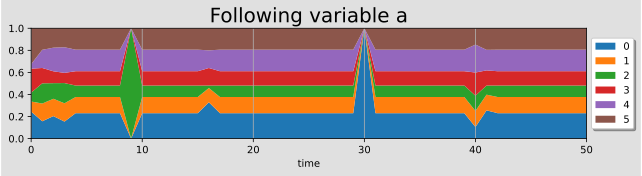

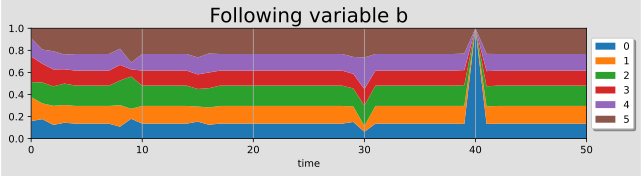

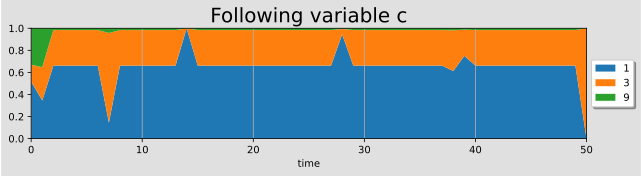

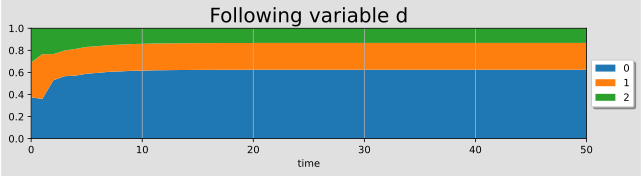

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
plotFollow(["a","b", "c", "d"], threeDBN, T=51, evs={('a',9):2, ('a',30):0, ('c',14):0, ('b',40):0, ('c',50):1})